<a href="https://colab.research.google.com/github/maronga/IP-Week-2-Core/blob/main/%22Moringa_Data_Science_Core_Wk2_Independent_Python_Project_2021_12_24_John_Maronga_Python_Notebook%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Univariate Analysis

## 1. Defining the Question

### a) Specifying the Question

How can we predict which individuals are most likely to have or use a bank account?

### b) Defining the Metric for Success

### c) Understanding the context 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

a) Loading the dataset

In [2]:
# Loading the Data from the source 
# Dataset url = http://bit.ly/MedicalCitiesIncomeDataset
#
df=pd.read_csv("http://bit.ly/FinancialDataset")
df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
df.info

<bound method DataFrame.info of       country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...         

The dataset has 23524 rows and 13 columns

In [4]:
# Previewing the top of our dataset
#
df.head(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [5]:
# Previewing the bottom of our dataset
# 
df.tail(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23514,Uganda,2018,uniqueid_2107,No,Urban,Yes,NaN,24.0,Female,Spouse,Married/Living together,Primary education,Self employed
23515,Uganda,2018,uniqueid_2108,No,Rural,No,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,uniqueid_2109,No,Urban,Yes,NaN,35.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

The dataset has only 3 data types, each column has the appropriate data type

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

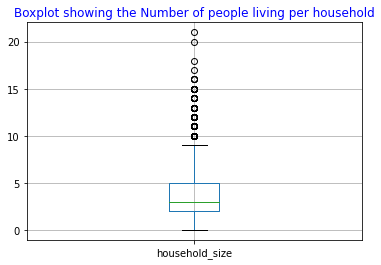

In [7]:
# Checking for Outliers in the household_size column
#
df.boxplot(['household_size'])
plt.title("Boxplot showing the Number of people living per household", color = 'blue')
plt.show()

There are outliers but we'll keep them because they are critical information which can't be ignored and its true that some households have more than 10 people living.

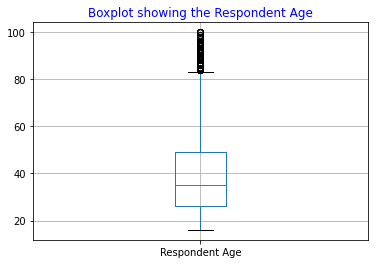

In [8]:
# Checking for Outliers in the Respondent age column
#
df.boxplot(['Respondent Age'])
plt.title("Boxplot showing the Respondent Age", color = 'blue')
plt.show()

There are outliers but we'll keep them because they are critical information which can't be ignored and it's logical for persons to be aged 80-100 years.

In [9]:
# Checking for Anomalies
#
print(df['year'].unique())

[2018 2029 2056 2016 2039 2017]


the year 2029 and 2056 are anomalies because the research was done during the year 2016 to 2018

In [10]:
# Checking for Anomalies
#
print(df['Level of Educuation'].unique())

['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6' nan]


In [11]:
# Checking for Anomalies
#
print(df['Type of Job'].unique())

['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' nan 'No Income']


In [12]:
# Identifying the Missing Data
#
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

Each column has missing values, apart from the year and unique id column

In [13]:
# Checking the percentage of missing values
df.isna().mean().round(4) * 100

country                   0.06
year                      0.00
uniqueid                  0.00
Has a Bank account        0.15
Type of Location          0.06
Cell Phone Access         0.05
household_size            0.12
Respondent Age            0.14
gender_of_respondent      0.14
The relathip with head    0.02
marital_status            0.14
Level of Educuation       0.12
Type of Job               0.13
dtype: float64

The percentage of missing values in each column is less than 0.2%

In [14]:
# Dealing with the Missing Data
# Dropping null values
df.dropna(inplace=True)

Dropped the null values in the dataset as they account for less than 0.2% of the data

In [15]:
# Confirming if there aren't any null values left
df.isna().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

There are no null values left

In [16]:
# More data cleaning procedures
# Replacing the column names
df.rename(columns={"The relathip with head": "Relationship_with_head",
'Level of Educuation':'level_of_education'},inplace = True)

In [17]:
# Renaming column names to uppercase and removing the spaces between columns
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [18]:
#Deleting the unnecessary columns
df.drop(['uniqueid'], axis = 1, inplace = True) 

In [19]:
df.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## 6. Exploratory Analysis

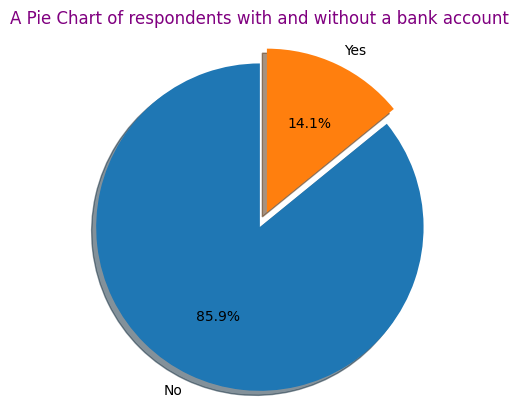

In [20]:
# A pie chart of the respondents who had/ had no bank account

# grouping the data to be plotted

account = df.has_a_bank_account.value_counts()
account

# accessing the data to plot

# labels
sizes= account.index
sizes

# values
data = account.values
data

# plotting the pie chart

plt.figure(figsize = (5,5), dpi = 100)
plt.pie(data, labels = sizes, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 90)
plt.axis('equal')
plt.title('A Pie Chart of respondents with and without a bank account', color = 'purple')
plt.show()


# the pie chart shows only a few respondents (14.1%) had a bank account 
# the majority (85.9%) did not have a bank account

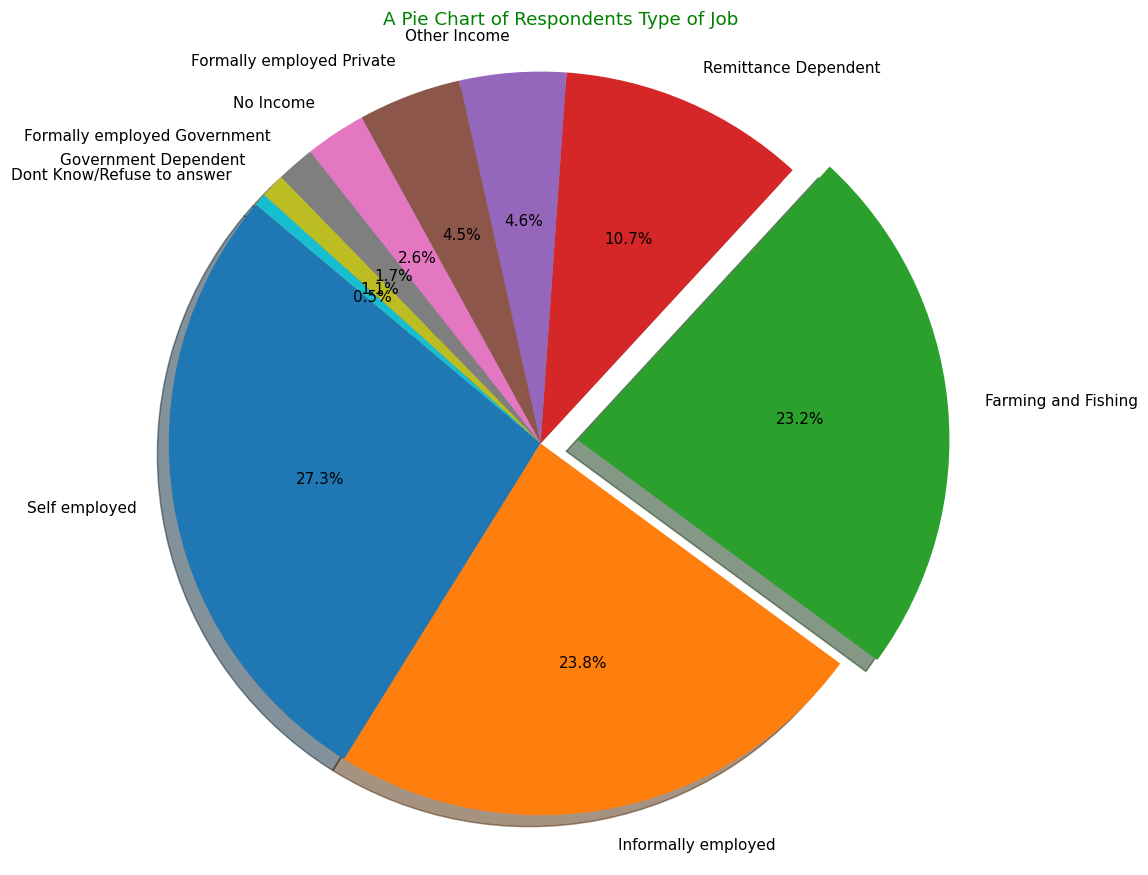

In [21]:
# A pie chart of the respondents type of job

# grouping the data to be plotted

job = df.type_of_job.value_counts()
job

# accessing the data to plot

# labels
sizes3= job.index
sizes3

# values
data3 = job.values
data3

# plotting the pie chart

plt.figure(figsize = (10,10), dpi = 110)
plt.pie(data3, labels = sizes3, autopct = '%1.1f%%', shadow = True, explode = (0,0,0.1,0,0,0,0,0,0,0), startangle = 140)
plt.axis('equal')
plt.title('A Pie Chart of Respondents Type of Job', color = 'green')
plt.show()


# the pie chart shows that the top 3 were self employed, informed employed, and practicing farming and fishing. 
# the majority (85.9%) did not have a bank account

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


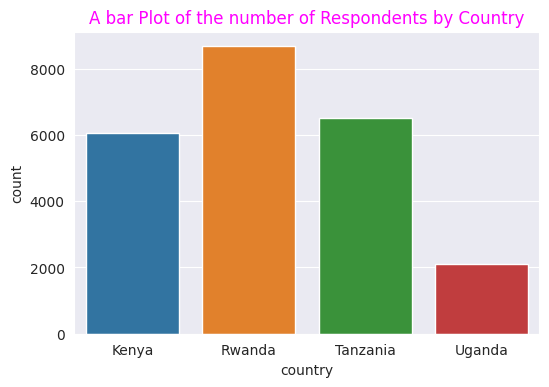

In [22]:
# Plotting a bar plot of the respondent country 

# Using seaborn to create a bar chart
# specifying our chart size
# Giving a title to our chart
# Displaying our chart

plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(df.country)
plt.title('A bar Plot of the number of Respondents by Country', color = 'magenta')
plt.show()


# The bar chart shows that most respondents were from Rwanda 
# the least number of respondents were from Uganda
# the number of respondents by country were not equal

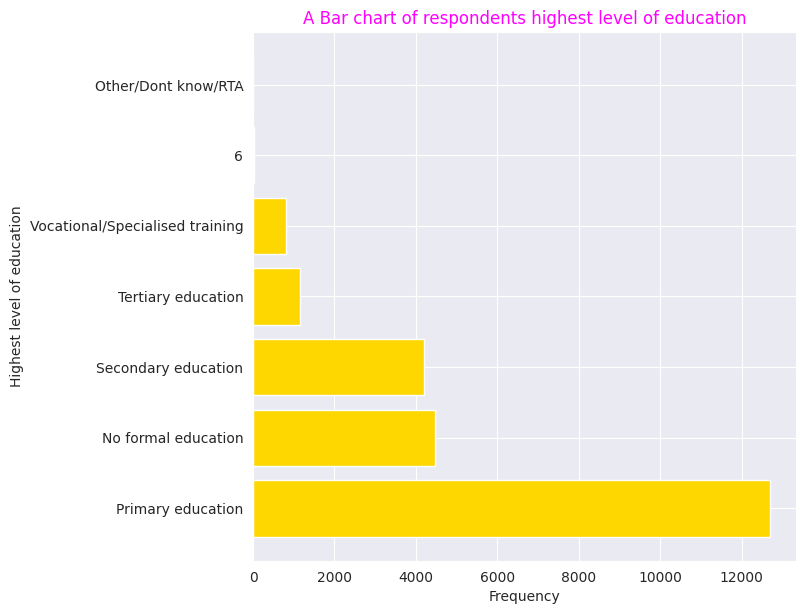

In [23]:
# # Plotting a horizontal bar plot of the respondent highest level of education 



# grouping the data to be plotted

Edu = df.level_of_education.value_counts()
Edu

# accessing the data to plot

# labels
sizes2= Edu.index
sizes2

# values
data2 = Edu.values
data2

# Using matplotlib to create a bar chart
# specifying our chart size
# labeling the y axis
# labeling the x axis
# Giving a title to our chart
# Displaying our chart

plt.figure(figsize = (7,7), dpi = 100)
plt.barh(sizes2, data2, color = 'gold')
plt.ylabel("Highest level of education")
plt.xlabel('Frequency')
plt.title("A Bar chart of respondents highest level of education", color = 'magenta')
plt.show()


# most respondents' highest level of education was the primary school
# there are other categories with the least number (others and 6)
# the 6 category seems to be an anomaly.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


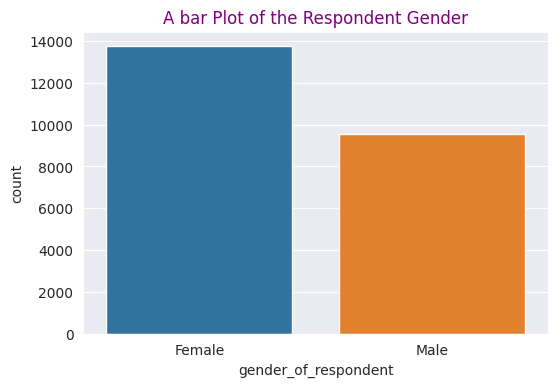

In [24]:
# Plotting a bar plot of the respondent gender 

# Using seaborn to create a bar chart
# specifying our chart size
# Giving a title to our chart
# Displaying our chart

plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(df.gender_of_respondent)
plt.title('A bar Plot of the Respondent Gender', color = 'purple')
plt.show()


# The bar chart shows that there were more female respondents than male respondents 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


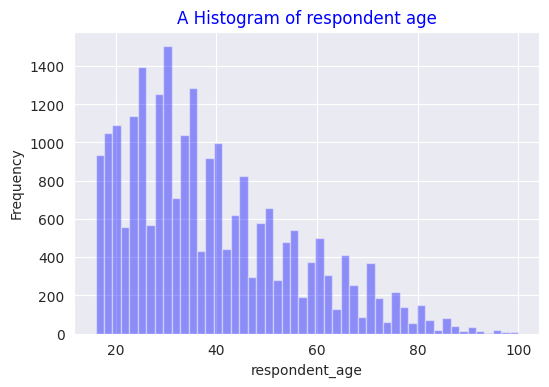

In [25]:
# Histogram of respondent age
# 

# Using seaborn to create a histogram
# labeling the y axis
# Giving a title to our chart
# Displaying our chart


plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.distplot(df['respondent_age'], kde = False, color = 'blue')  
plt.title('A Histogram of respondent age', color = 'blue')
plt.ylabel('Frequency')
plt.show()


# the histogram shows us that the age distribution is skewed to the right
# this is because the tail is long to the right side





# In a perfect normal distribution, the tails on either side of the curve are exact mirror images of each other.

# When a distribution is skewed to the left, the tail on the curve’s left-hand side is longer than the tail on the right-hand side,
# and the mean is less than the mode. This situation is also called negative skewness.

# When a distribution is skewed to the right, the tail on the curve’s right-hand side is longer than the tail on the left-hand side, 
# and the mean is greater than the mode. This situation is also called positive skewness.

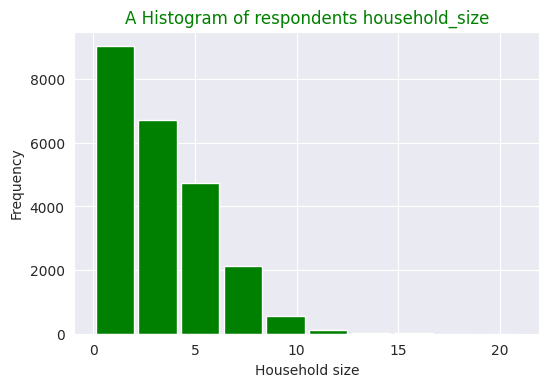

In [26]:
# Histogram of respondent household_size
	 

# Using matplotlib to create a histogram
# labeling the x axis
# labeling the y axis
# Giving a title to our chart
# Displaying our chart



plt.figure(dpi = 100)
plt.hist(df['household_size'], bins = 10, histtype = 'bar', rwidth = 0.9, color = 'green')
plt.xlabel('Household size')
plt.ylabel('Frequency')
plt.title('A Histogram of respondents household_size', color = 'green')
plt.show()

# the histogram shows us that the household size distribution is skewed to the right
# this is because the tail is long to the right side

In [27]:
# Frequency table of type of locations categories and their value counts


# Making a crosstab
# Naming the count column

location = pd.crosstab(index = df['type_of_location'], columns = 'count')
location

# Most respondents were from the rural areas

col_0,count
type_of_location,
Rural,14264
Urban,9079


In [28]:
# Frequency table of cell_phone_access categories and their value counts


# Making a crosstab
# Naming the count column

phone = pd.crosstab(index = df['cell_phone_access'], columns = 'count')
phone

# Most respondents had access to a cell phone 

col_0,count
cell_phone_access,
No,6009
Yes,17334


In [32]:
# Frequency table of interviewee relationship_with_head of the house categories and their value counts


# Making a crosstab
# Naming the count column

relation = pd.crosstab(index = df['relationship_with_head'], columns = 'count')
relation

# Majority of the respondents were the head of the household followed by the spouse
# while the least constituted other non-relatives.

col_0,count
relationship_with_head,
Child,2221
Head of Household,12730
Other non-relatives,189
Other relative,663
Parent,1069
Spouse,6471


In [33]:
# Frequency table of interviewee martial status categories and their value counts


# Making a crosstab
# Naming the count column

marital = pd.crosstab(index = df['marital_status'], columns = 'count')
marital

# Majority of the respondents were married and living together with their spouses folowed by single/never married

# while the least constituted of people who did not know their marital status.

col_0,count
marital_status,
Divorced/Seperated,2049
Dont know,8
Married/Living together,10700
Single/Never Married,7903
Widowed,2683


Measures of central tendency

In [34]:
# Mean of the respondent household_size

df.household_size.mean()

# average household size was 3

3.6886432763569377

In [35]:
# Mean of the respondent respondent_age

df.respondent_age.mean()

# average age of the interviewees was 38

38.80550914621085

In [36]:
# mode of the respondent household_size

df.household_size.mode()

# most occuring household size was 2 members only


0    2.0
dtype: float64

In [37]:
# mode of the respondent_age

df.respondent_age.mode()

# most occuring age is 30

0    30.0
dtype: float64

In [38]:
# median of the respondent household_size

df.household_size.median()


# arranging the data in ascending/descending order, the middle observation for the household size was 3

3.0

In [39]:
# median of the respondent_age

df.respondent_age.median()

## arranging the data in ascending/descending order, the middle age was 35

35.0

Measures of Dispersion/Variability/Spread

In [40]:
# Range of the household_size

hMax = df.household_size.max()
print(hMax)

hMin = df.household_size.min()
print(hMin)

hRange = hMax - hMin
hRange

21.0
0.0


21.0

In [41]:
# Range of the respondent_age

aMax = df.respondent_age.max()
print(aMax)

aMin = df.respondent_age.min()
print(aMin)

aRange = aMax - aMin
aRange

100.0
16.0


84.0

In [42]:
# QUANTILES

# Quartiles are values that divide your data into quarters when data is sorted in an ascending order.

# There are three quartile values. 

# Q1: First quartile is the 25 percentile. 
# Q2: Second quartile is the 50 percentile...also...median of the data
# Q3: Third quartile is the 75 percentile. 


# THE INTERQUARTILE RANGE ...also ..IQR

# IQR = Q3 -Q1

In [43]:
# Quantiles of the household_size

df["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [44]:
# Quantiles of the respondent_age

df["respondent_age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64

In [45]:
# Standard Deviation of the household_size

df.household_size.std()


# 2.3 is a low std dev hence the data points are close to the mean (3.7) of the data set

2.2811835250351495

In [46]:
# Standard Deviation of the respondent_age

df.respondent_age.std()


# 16.5 is a high std dev showing that the data points are spread out over a wide range of values

16.51980349804178

In [47]:
# Variance of the household_size

df.household_size.var()


# var of 5.2 is a small variance compared to the mean of 3.7 hence the dataset does have few dis-similarities amongst its members

5.20379827489179

In [48]:
# Variance of the respondent_age

df.respondent_age.var()


# var of 272.9 is very large compared to the mean of 38.8. This indicates that the age distribution have some very large dis-similarities.

272.90390761391353

In [49]:
# Skewness of the household_size

df.household_size.skew()

# The household size distribution is skewed to the right since its skewness is a positive value.
# This was also seen in the histogram above on visualizations: long right tail.

0.9741086837897069

In [50]:
# Skewness of the respondent_age


df.respondent_age.skew()

# The age distribution is skewed to the right since its skewness is a positive value.
# This was also seen in the age histogram above on visualizations: long tail on the right handside.

0.840661747532081

In [51]:
# Kurtosis of the household_size

df.household_size.kurt()



# The household kurtosis is greater than zero hence the distribution has heavier tails ....This is called a leptokurtic distribution

1.1538690689335573

In [52]:
# Kurtosis of the respondent_age

df.respondent_age.kurt()

# The kurtosis is close to 0, hence a normal distribution is assumed....This is called mesokurtic distributions

0.09844652254807196

BIVARIATE ANALYSIS

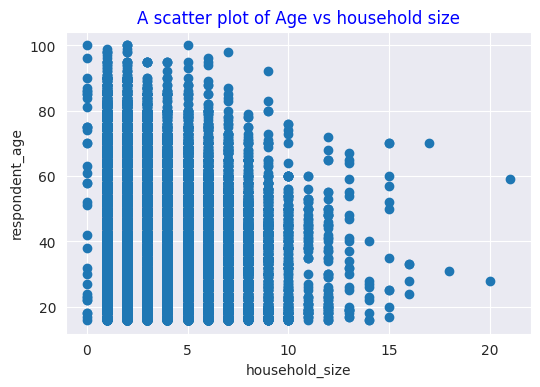

In [53]:
# Using Matplotlib: Plotting our scatterplot to compare two numerical the variables

# Specifying the chart size

plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(df['household_size'], df['respondent_age'])

# Giving the scatterplot a title
plt.title('A scatter plot of Age vs household size', color = 'blue')

# Labelling the x axis
plt.xlabel('household_size')

# Labelling the y axis
plt.ylabel('respondent_age')

# We then display our scatterplot 
plt.show()




# There is no correlation between age and household size in the dataset as the points are scattered throughout the graph.

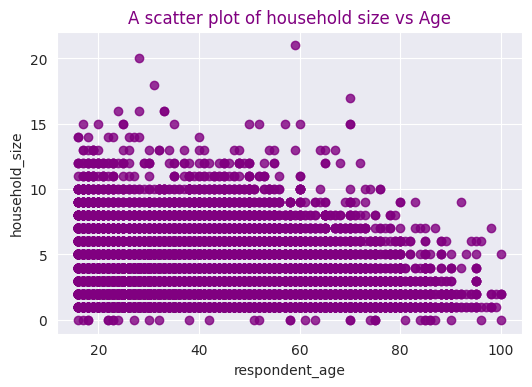

In [54]:
# Or Using Seaborn: 

# Specifying the dots per inch
# Using the function regplot from Seaborn to create our scatterplot
# creating a title for our scatter plot
# displaying the scatter plot


plt.figure(dpi = 100)
sns.regplot(x= df['respondent_age'], y= df['household_size'], fit_reg = False, color = 'purple')
plt.title("A scatter plot of household size vs Age", color = 'purple')
plt.show()



# There is no correlation as the points are scattered throughout the graph.

In [55]:
# Selecting a few observations in each column to plot a line graph
# There are too many observations to plot all
# using the iloc to select
# 50 rows  
# previewing the selection

df5 = df.iloc[0:50,-7:-5] 
df5.head()

,household_size,respondent_age
0,3.0,24.0
1,5.0,70.0
2,5.0,26.0
3,5.0,34.0
4,8.0,26.0


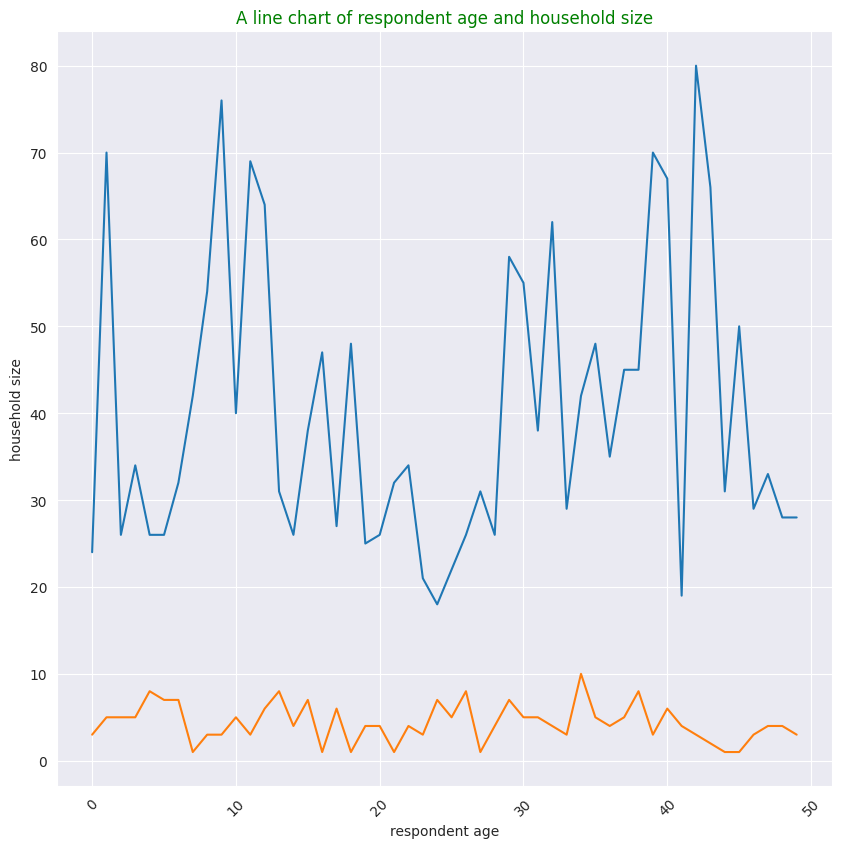

In [56]:
# Line chart of the respondent age and household size for the first 50 rows only


# figure size specifications
# creating a line chart using matplotlib
# Rotating our x axis ticks
# labelling the title
# labelling the x axis
# labelling the y axis
# Displaying our chart



plt.figure(figsize = (10,10), dpi = 100)
plt.plot(df5[['respondent_age', 'household_size']])
plt.xticks(rotation = 45)
plt.title('A line chart of respondent age and household size', color = 'Green')
plt.xlabel('respondent age')
plt.ylabel('household size')
plt.show()

In [57]:
# Calculating the Pearson Correlation Co-efficient

PCORR = df["respondent_age"].corr(df["household_size"], method="pearson") 
print(PCORR)

# We do not need to define the pearson, it calculates by default

pcorr = df["respondent_age"].corr(df["household_size"]) 
print(pcorr)



# Since the correlation coefficent of Age and Household is -0.12, 
# this means that Age and Household have a very weak negative correlation

-0.11970919507762415
-0.11970919507762415


In [58]:
# Calculating the pearson coefficient of the entire dataframe

df.corr() 

,year,household_size,respondent_age
year,1.000000,-0.048902,-0.019062
household_size,-0.048902,1.000000,-0.119709
respondent_age,-0.019062,-0.119709,1.000000


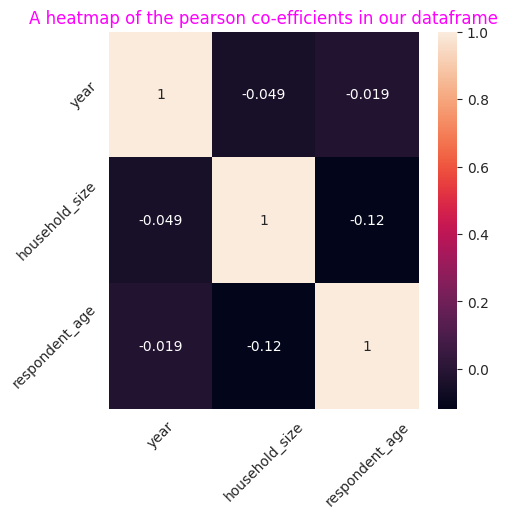

In [59]:
# Heatmap


# defining our data
# figure size specifications
# using the Seaborn Visualization library
# Rotating our x axis ticks
# Rotating our y axis ticks
# labelling the title
# displaying our chart


x = df.corr()
plt.figure(figsize = (5,5), dpi = 100)
sns.heatmap(x, xticklabels = x.columns, yticklabels=x.columns, annot = True)
plt.title('A heatmap of the pearson co-efficients in our dataframe', color = "magenta")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()
  


# all the variables have weak negative correlation with other variables other with themselves

MULTIVARIATE

In [61]:
# Converting the categories into dummy variables with ones and zeros

# pd.get_dummies creates a new dataframe which consists of zeros and ones.

dummy = pd.get_dummies(df[['country', 'type_of_location', 'cell_phone_access', 'gender_of_respondent','relationship_with_head', 'marital_status', 'level_of_education', 'type_of_job']])
dummy.head()

,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [62]:
# Since we’ve created a whole new dataframe, 
# in order to compare it to our original dataframe,
# we’re going to need to either merge or concatenate them to work with them properly.

# The dummy variables will be on the right side of our dataframe 
# As they are columns, I concatenate them on axis=1.

# concatenating 

dff = pd.concat([df, dummy], axis = 1)
dff.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [65]:
# Preprocessing steps


# Step 1
# The first preprocessing step is to divide the dataset into;
# a feature set: X, 
# and corresponding label: y.


X = dff.drop(columns = ['country','has_a_bank_account',	'type_of_location',	'cell_phone_access',	'household_size',	'respondent_age',	'gender_of_respondent',	'relationship_with_head',	'marital_status',	'level_of_education' ,	'type_of_job'], axis = 1)
y = dff['has_a_bank_account']

In [66]:
X.head(5)

,year,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [67]:
y.head(2)

0    Yes
1     No
Name: has_a_bank_account, dtype: object

In [68]:
# Step 2
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [69]:
# Step 3
# Normalization
# PCA performs best with a normalized FEATURE SET (X). 
# We will perform standard scaler normalization to normalize our feature set

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [70]:
# Step 4
# Applying PCA
# Performing PCA using Python's Scikit-Learn library.

# PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.

# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 

# The transform method returns the specified number of principal components.

# In the code below, we create a PCA object named pca1 
# We did not specify the number of components in the constructor. 
# Hence, all of the features in the feature set will be returned for both the training and test sets.
# 

from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [71]:
# Step 4
# Applying PCA
# Performing PCA using Python's Scikit-Learn library.

# PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.

# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 

# The transform method returns the specified number of principal components.

# In the code below, we create a PCA object named pca1 
# We did not specify the number of components in the constructor. 
# Hence, all of the features in the feature set will be returned for both the training and test sets.
# 

from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
# Step 5
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# The line of code below will output the "explained variance ratio".
# 


explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.10564806, 0.07874043, 0.06673617, 0.06030687, 0.05529161,
       0.0464664 , 0.0416741 , 0.03929052, 0.03795157, 0.03349106,
       0.03331338, 0.03008282, 0.02942218, 0.0278611 , 0.02735896,
       0.02702542, 0.02690252, 0.02656553, 0.02646046, 0.02615242,
       0.02603988, 0.0249849 , 0.02398583, 0.02217831, 0.02147203])

Linear Discriminant Analysis (LDA)

In [72]:
# Step a
# Divide dataset into features (z) and corresponding labels (s)
# and then divide the resultant dataset into training and test sets. 

# The following code divides data into labels and feature set. 
# The code assigns the first four columns of the dataset i.e. the feature set to X variable 
# while the values in the fifth column (labels) are assigned to the y variable.
#
z = dff.iloc[:, 12:].values
s = dff.iloc[:, 2].values

In [73]:
z

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [74]:
s

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [75]:
# Step b: 
# Divide data into training and test sets
#
from sklearn.model_selection import train_test_split

z_train, z_test, s_train, s_test = train_test_split(z, s, test_size=0.2, random_state=0)

In [76]:
# step c
# Performing feature scaling. 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
z_train = sc.fit_transform(z_train)
z_test = sc.transform(z_test)

In [83]:
# step d
# Performing LDA with Scikit-Learn. 


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=24)
z_train = lda.fit_transform(z_train, s_train)
z_test = lda.transform(z_test)

 
# The n_components parameter of the LDA, refers to the number of linear discriminates that we want to retrieve. 
# We fit and transform methods to retrieve the linear discriminants.
# Incase of LDA, the transform method takes two parameters: the z_train and the s_train. 
# This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants

ValueError: ignored

Multiple Regression Analysis

In [78]:
# Linear Regression is a way of predicting a response Y on the basis of a single predictor variable X. 
# It is assumed that there is approximately a linear relationship between X and Y. 
# Mathematically, this relationship is represented as: Y ≈ ɒ + ß X + ℇ where ɒ and ß are two unknown constants 
# that represent intercept and slope terms in the linear model 
# and ℇ is the error in the estimation.

# Linear Regression:
          # Fast and easy to model
          # very sensitive to outliers.
          # less complex with less data
          # easy to understand and interpret

        # libraries we need in addition to others earlier imported
        
from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [79]:
# Binary encoding our Target variable
# since it has two categories (yes/no)

dff['bank'] = dff['has_a_bank_account'].map( {'Yes':1, 'No':0} )
dff[['bank', 'has_a_bank_account']]

,bank,has_a_bank_account
0,1,Yes
1,0,No
2,1,Yes
3,0,No
4,0,No
...,...,...
23519,0,No
23520,0,No
23521,0,No
23522,0,No


In [80]:
# Confirming that we have no anomalies and null values in the new column created
#

dff.bank.unique()

dff.isnull().sum()

country                                               0
year                                                  0
has_a_bank_account                                    0
type_of_location                                      0
cell_phone_access                                     0
household_size                                        0
respondent_age                                        0
gender_of_respondent                                  0
relationship_with_head                                0
marital_status                                        0
level_of_education                                    0
type_of_job                                           0
country_Kenya                                         0
country_Rwanda                                        0
country_Tanzania                                      0
country_Uganda                                        0
type_of_location_Rural                                0
type_of_location_Urban                          

In [81]:

# Describing our data

dff.info()
dff.describe()
dff.columns

# has_a_bank_account is the dependent variable and the last 34 columns are the independent variables, 
# here we are predicting which individuals are most likely to have or use a bank account. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 51 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country                                             23343 non-null  object 
 1   year                                                23343 non-null  int64  
 2   has_a_bank_account                                  23343 non-null  object 
 3   type_of_location                                    23343 non-null  object 
 4   cell_phone_access                                   23343 non-null  object 
 5   household_size                                      23343 non-null  float64
 6   respondent_age                                      23343 non-null  float64
 7   gender_of_respondent                                23343 non-null  object 
 8   relationship_with_head                              23343 non-null  object 


Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job', 'country_Kenya', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda', 'type_of_location_Rural',
       'type_of_location_Urban', 'cell_phone_access_No',
       'cell_phone_access_Yes', 'gender_of_respondent_Female',
       'gender_of_respondent_Male', 'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'level_of_education_6', 'level

In [ ]:
# PAIRPLOT

# Creating a pairplot to build histograms and scatter plots.
# using seaborn visualization library

sns.pairplot(dff)

 
# The histogram on the diagonal allows us to see the distribution of a single variable
# Whereas the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

In [ ]:
# Correlation between the variables in the dataset.
# The correlation coefficient, is an index that ranges from -1 to 1. 
# Values near zero indicate that there is no linear relationship. 
# As the correlation gets closer to plus or minus one, the relationship is stronger. 
# A value of one (or negative one) indicates a perfect linear relationship between two variables.


dff.corr()

In [ ]:
# Heatmap
# Plots the correlation.
# The darker shade shows that there is no linear relationship between the two variables. 
# A lighter shade shows that the relationship between the variables is more linear.

plt.figure(dpi = 100)
sns.heatmap(dff.corr())

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

# b). Do we need other data to answer our question?

### c). Did we have the right question?